In [70]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier 
from catboost import CatBoostClassifier
import keras
from keras import models
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import layers
import tensorflow as tf
from tensorflow.keras.layers import Dense, InputLayer

In [41]:
df = pd.read_csv('/Users/adarshbadjate/Downloads/recruitment_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


In [12]:
df.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


In [13]:
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


<Figure size 600x600 with 0 Axes>

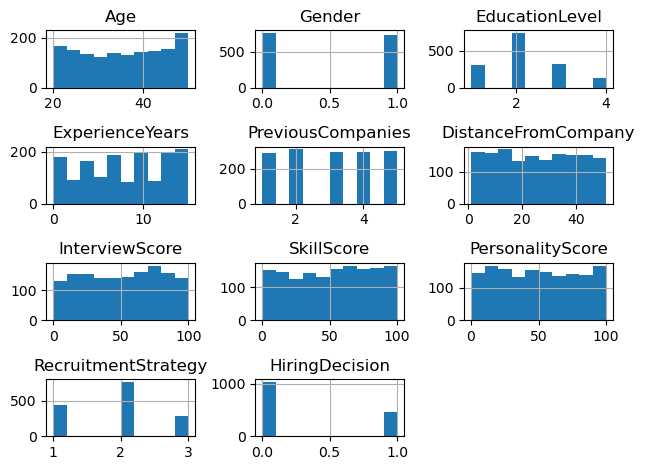

In [17]:
plt.figure(figsize=(6,6))
df.hist()
plt.tight_layout()
plt.show()

In [18]:
df.columns

Index(['Age', 'Gender', 'EducationLevel', 'ExperienceYears',
       'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore',
       'SkillScore', 'PersonalityScore', 'RecruitmentStrategy',
       'HiringDecision'],
      dtype='object')

In [31]:
nums_columns = ['Age','ExperienceYears','DistanceFromCompany','InterviewScore','SkillScore','PersonalityScore']
cat_cols = ['Gender','RecruitmentStrategy','PreviousCompanies']
ord_cols = ['EducationLevel']
target = ['HiringDecision']

In [23]:
def plot_histrogram(df, num_cols):
    for col in num_cols:
        plt.figure(figsize=(4,2))
        plt.hist(df[col], bins=25, color='lightgreen', edgecolor='black')
        plt.title(f'Histrogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.tight_layout()
        plt.show

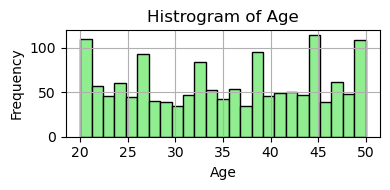

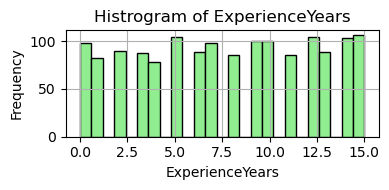

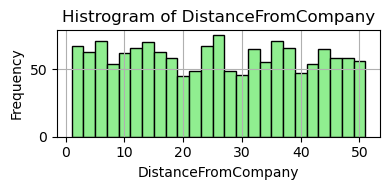

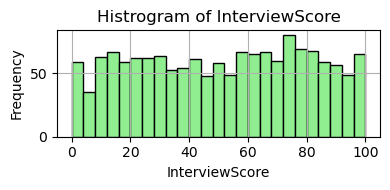

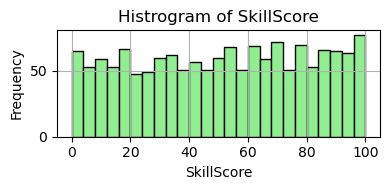

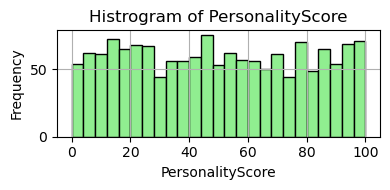

In [24]:
plot_histrogram(df, nums_columns)

In [28]:
def plot_boxplot(df, num_cols):
    for col in num_cols:
        plt.figure(figsize=(4,2))
        sns.boxplot(x=df[col], color='red')
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
        plt.grid(True)
        plt.show()

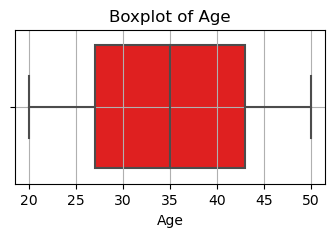

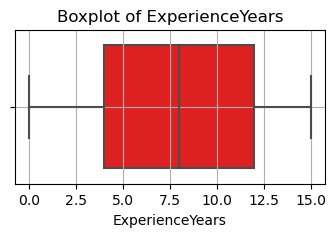

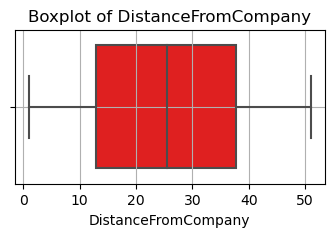

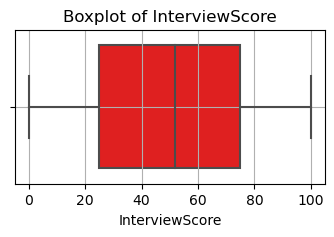

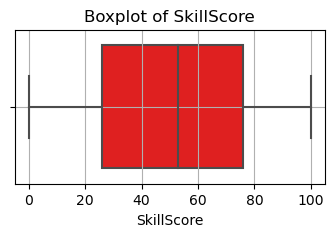

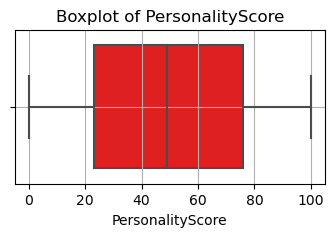

In [29]:
plot_boxplot(df, nums_columns)

In [35]:
def create_bargraphs(data, cat_cols):
    for col in cat_cols:
        data[col] = pd.Categorical(data[col], ordered=True)
        category_counts = data[col].value_counts().sort_index()
        plt.figure(figsize=(6,4))
        category_counts.plot(kind='bar')
        plt.title(f'Bar graph for {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=90,fontsize=6)
        plt.grid(axis='y',linestyle='--',alpha=0.7)
        plt.tight_layout()
        plt.show()

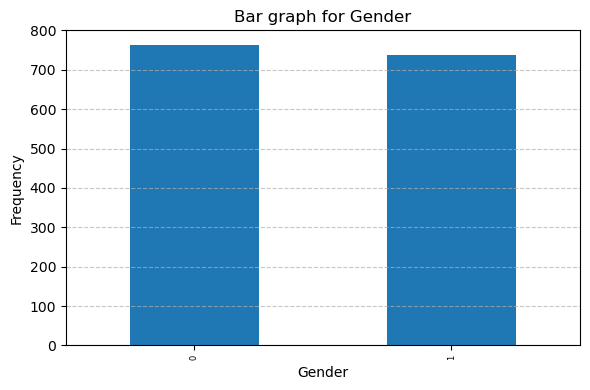

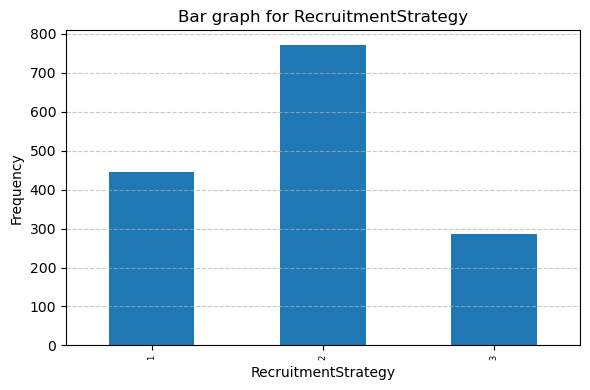

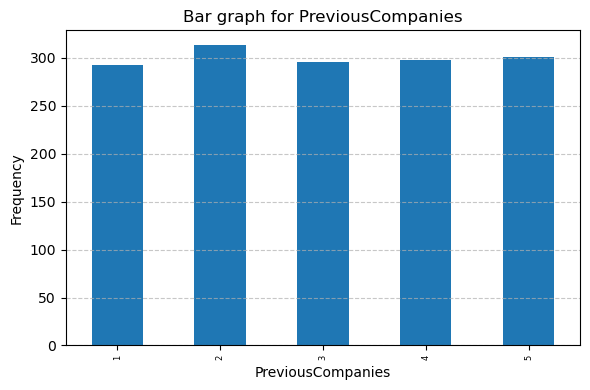

In [36]:
create_bargraphs(df, cat_cols)

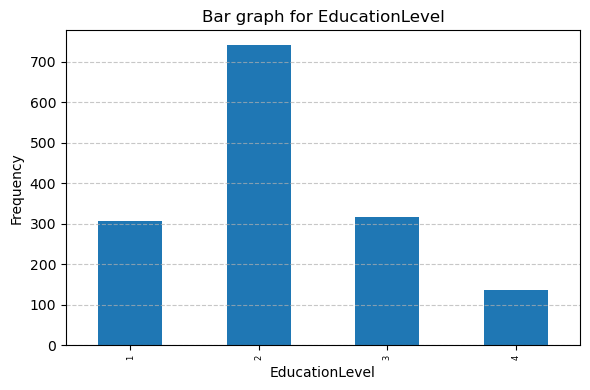

In [37]:
create_bargraphs(df,ord_cols)

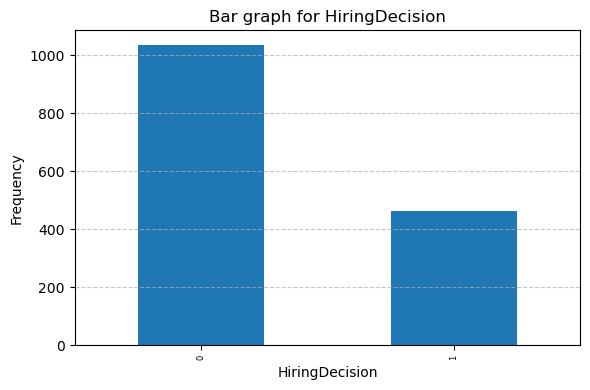

In [38]:
create_bargraphs(df,target)

In [39]:
pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).head(20)

,0
Age,0
Gender,0
EducationLevel,0
ExperienceYears,0
PreviousCompanies,0
DistanceFromCompany,0
InterviewScore,0
SkillScore,0
PersonalityScore,0
RecruitmentStrategy,0


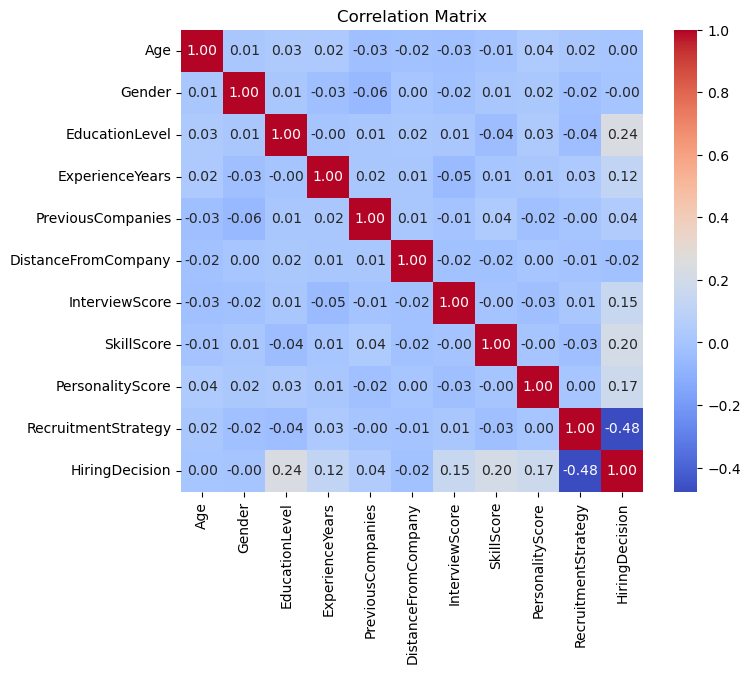

In [42]:
correlation_matrix = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt = ".2f", square = True)
plt.title('Correlation Matrix')
plt.show()

In [43]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

ode_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

In [44]:
col_trans = ColumnTransformer(transformers=[
    ('num_p', num_pipeline, nums_columns),
    ('ode_p', ode_pipeline, ord_cols),
    ('ohe_p', ohe_pipeline, cat_cols)
],
remainder='passthrough',
n_jobs=-1)

In [45]:
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

In [46]:
X = df.drop(columns=['HiringDecision'], axis=1)
y = df['HiringDecision'].astype(int)

In [48]:
X_preprocessed = pipeline.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=25)


In [50]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy for RFC: ", accuracy)
print(classification_report(y_test,y_pred))

Accuracy for RFC:  0.9422222222222222
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       150
           1       0.97      0.85      0.91        75

    accuracy                           0.94       225
   macro avg       0.95      0.92      0.93       225
weighted avg       0.94      0.94      0.94       225



In [55]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy of SGD: ', accuracy)
print(classification_report(y_test,y_pred))

Accuracy of SGD:  0.7955555555555556
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       150
           1       1.00      0.39      0.56        75

    accuracy                           0.80       225
   macro avg       0.88      0.69      0.71       225
weighted avg       0.84      0.80      0.76       225



In [60]:
cbc = CatBoostClassifier(verbose=0)
cbc.fit(X_train,y_train)
y_pred = cbc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy of cbc: ', accuracy)
print(classification_report(y_test,y_pred))

Accuracy of cbc:  0.9555555555555556
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       150
           1       0.97      0.89      0.93        75

    accuracy                           0.96       225
   macro avg       0.96      0.94      0.95       225
weighted avg       0.96      0.96      0.96       225



In [61]:
params_gird_cbc = {
    'iterations': [50,100,500,1000],
    'depth': [2,4,6,8,10],
    'learning_rate': [0.01,0.05,0.1,0.5]
}


In [62]:
cbc_cv = GridSearchCV(cbc, params_gird_cbc, cv=3, scoring='accuracy',  n_jobs=-1)
cbc_cv.fit(X_train, y_train)
print('Best Score: ', cbc_cv.best_score_)
print('Best_params: ', cbc_cv.best_params_)

Best Score:  0.9584313725490196
Best_params:  {'depth': 8, 'iterations': 100, 'learning_rate': 0.1}


In [63]:
best_cbc = cbc_cv.best_estimator_
best_cbc_pred = best_cbc.predict(X_test)
print(classification_report(y_test, best_cbc_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       150
           1       0.99      0.89      0.94        75

    accuracy                           0.96       225
   macro avg       0.97      0.94      0.95       225
weighted avg       0.96      0.96      0.96       225



In [71]:
model = models.Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sprase_categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

/Users/adarshbadjate/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,338 (9.13 KB)

 Trainable params: 2,338 (9.13 KB)

 Non-trainable params: 0 (0.00 B)

None


In [73]:
dnn_pred = model.predict(X_test)

dnn_pred = np.argmax(dnn_pred, axis=1)

print(classification_report(y_test, dnn_pred))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       150
           1       0.42      0.24      0.31        75

    accuracy                           0.64       225
   macro avg       0.55      0.54      0.53       225
weighted avg       0.60      0.64      0.60       225



Overall, the best model so far for this dataset is a default CatBoostClassifier as it beat the CV Search CatBoost in Precision and thus F-1 Score for our Hired class. For further testing, I'd like to improve my Deep Learning models predictability as well as use Optuna to see if the CatBoost model has some better hyperparameters that I could be using to beat my current accuracy score for both target classes. I'd also likely test what happens when I drop the uncorrelated features from the data set and maybe do some feature engineering to have more robust models.